# Weather Australia

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
import datetime as dt


In [48]:
weather = pd.read_csv("WheterAU/weatherAUS.csv")
weather.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [49]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [50]:
weather.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W

In [51]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<AxesSubplot:title={'center':'Distribuzione dei dati suddivisi per anni'}, xlabel='Date', ylabel='count'>

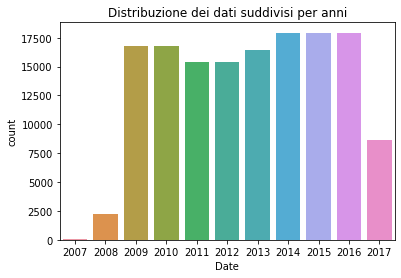

In [52]:
plt.title('Distribuzione dei dati suddivisi per anni')
sns.countplot(x=pd.to_datetime(weather.Date).dt.year)

## Relationship between Sunshine and Evaporation

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

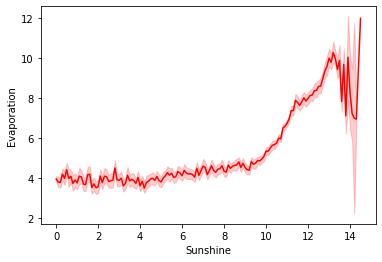

In [53]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',color='red')

## Relationship between Sunshine and Rainfall
#### When sunshine increases, rainfall decreases

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

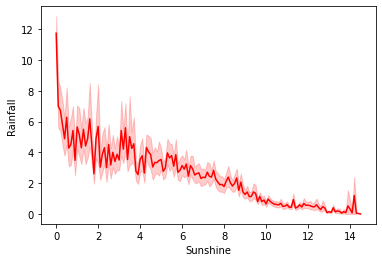

In [54]:
sns.lineplot(data=weather,x='Sunshine',y='Rainfall',color='red')

<AxesSubplot:>

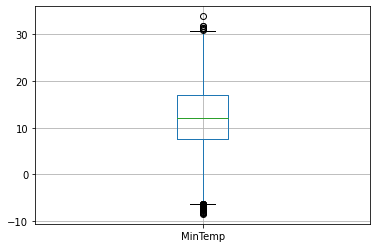

In [29]:
weather[['MinTemp']].boxplot()

In [30]:
#df_copy = weather
#drop = df_copy.drop(columns=['Date','Location','WindGustDir','WindDir9am', 'WindDir3pm', 'Cloud9am','Cloud3pm'])
#sns.pairplot(drop)
#sns.pairplot(x_vars =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             #y_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             #data = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','RainToday']],
             #hue = 'RainToday')
#plt.show()

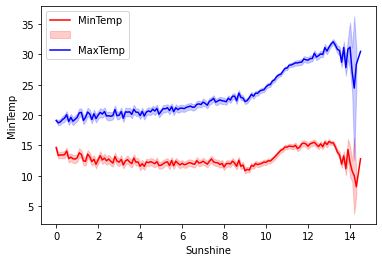

In [65]:
sns.lineplot(data=weather,y='MinTemp',x='Sunshine',color='red')
sns.lineplot(data=weather,y='MaxTemp',x='Sunshine',color='blue')
plt.legend(labels=["MinTemp",None,"MaxTemp"])

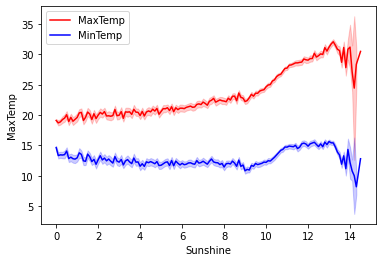

In [64]:

sns.lineplot(data=weather,y='MaxTemp',x='Sunshine', label="MaxTemp", color="red" )
sns.lineplot(data=weather,y='MinTemp',x='Sunshine', label="MinTemp", color="blue" )
plt.legend()



## Relationship between Sunshine and MinTemp & MaxTemp

## Relationship between WindGustSpeed and Rainfall
### There is a not clear relationship between WindGustSpeed and Rainfall

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

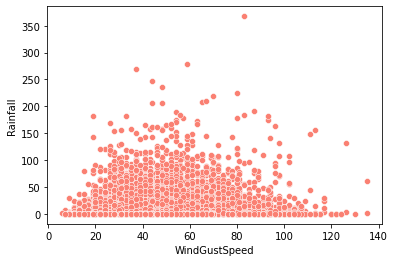

In [ ]:
sns.scatterplot(data=weather,x='WindGustSpeed',y='Rainfall',color='salmon')

## Relationship between Sunshine and WindGustSpeed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Sunshine'>

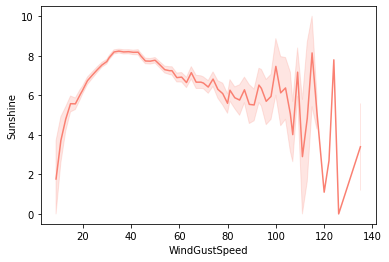

In [ ]:
sns.lineplot(data=weather,x='WindGustSpeed',y='Sunshine',color='salmon')

## Country with the count of RainToday

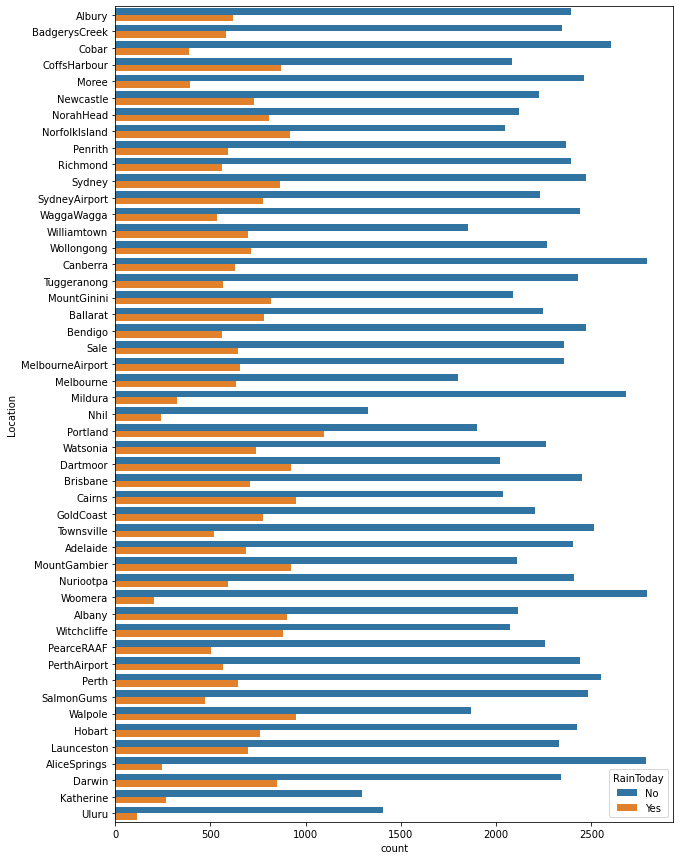

In [ ]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'Location',hue = 'RainToday', data = weather)
plt.show()

## TOP 20 Country with max rainfall

C:\Users\Utente\AppData\Local\Temp\ipykernel_2040\191866656.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df=weather.groupby(by='Location').max().sort_values(by='Rainfall',ascending=False)[0:20]


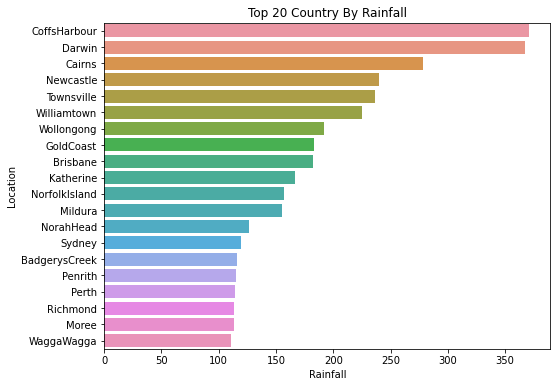

In [ ]:
df=weather.groupby(by='Location').max().sort_values(by='Rainfall',ascending=False)[0:20]
plt.figure(figsize=(8,6))
sns.barplot(data=df,y=df.index,x='Rainfall')
plt.title("Top 20 Country By Rainfall")
plt.show()

## Correlation between Sunshine and Evaporation hue by RainTomorrow

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

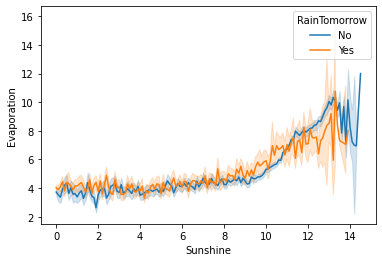

In [ ]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',hue='RainTomorrow')

## Total sum of rainfall per year

In [ ]:
df=weather.groupby(by=pd.to_datetime(weather.Date).dt.year).max().sort_values(by='Rainfall')
fig = px.bar(df,y='Rainfall')
fig.show()


C:\Users\Utente\AppData\Local\Temp\ipykernel_2040\1848920830.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df=weather.groupby(by=pd.to_datetime(weather.Date).dt.year).max().sort_values(by='Rainfall')


## Correlation between datas

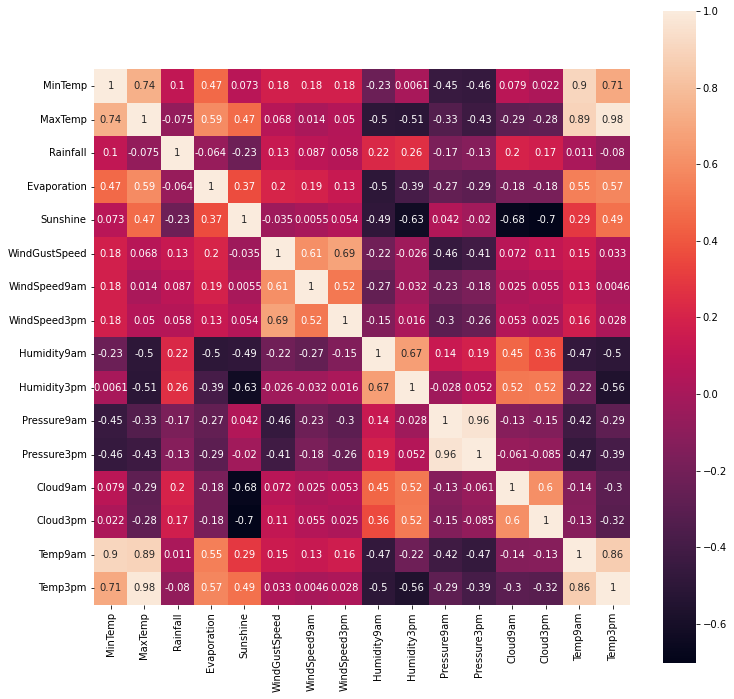

In [ ]:
df2 = weather
check_data = df2.drop(columns=['Date','Location'])
plt.subplots(figsize=(12, 12))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()


###### Here, we should compare the data range within the dataset and the actual date range in days. In time series analysis, it is required that all periods are present. There should be a frequency in the data; here, it is in days.

###### Out of the 3433 dates, there are 3344 days present. The new index contains data from all periods; missing data is filled with the average rainfall over the years.

## Time series analysis: MinTemp in Canberra

In [ ]:
mask = (weather['Date'] > '2008-01-1') & (weather['Date'] <= '2020-12-30') & (weather['Location'] == 'Canberra')

#var = weather_ts[weather_ts.Location == 'Sydney']
var = weather.loc[mask]
#print(var)
#var_series=var.MinTemp.dropna()
index= var.Date
var = var.set_index(index)
var_series= var['MinTemp'].dropna()
print(var_series)
#sns.lineplot(var_series)


Date
2008-01-10    14.7
2008-01-11    17.5
2008-01-12    20.9
2008-01-13    17.0
2008-01-14    16.0
              ... 
2017-06-21    -2.4
2017-06-22    -0.4
2017-06-23    -2.9
2017-06-24     0.1
2017-06-25    -4.3
Name: MinTemp, Length: 3360, dtype: float64


In [ ]:
var_series2=pd.DataFrame(var_series)
var_series2.index = pd.to_datetime(var_series2.index)
var_series2['month_year'] = var_series2.index.to_period('M')
var_series2=var_series2.groupby(var_series2.month_year)['MinTemp'].mean()
#var_series2.index = var_series2.index.strftime('%Y-%m')
var_series2.index=var_series2.index.to_timestamp()
#var_series2.index = datetime.strptime(str(var_series2.index),'%Y-%m')
print(var_series2)

var_series=var_series2

month_year
2008-01-01    15.381818
2008-02-01    12.700000
2008-03-01    10.867742
2008-04-01     5.183333
2008-05-01     2.538710
                ...    
2017-02-01    12.878571
2017-03-01    12.767742
2017-04-01     5.536667
2017-05-01     1.596774
2017-06-01    -1.092000
Name: MinTemp, Length: 111, dtype: float64


##### Ho: la serie è stazionaria
##### se p-value > 0.05 la serie è non stazionaria

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(var_series)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])

ADF Statistic: -2.334430
p-value: 0.161104


##### Ho: la serie è non stazionaria stazionaria
##### se p-value > 0.05 la serie è stazionaria

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    

In [ ]:
kpss_test(var_series)

Results of KPSS Test:
Test Statistic           0.046881
p-value                  0.100000
#Lags Used               5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




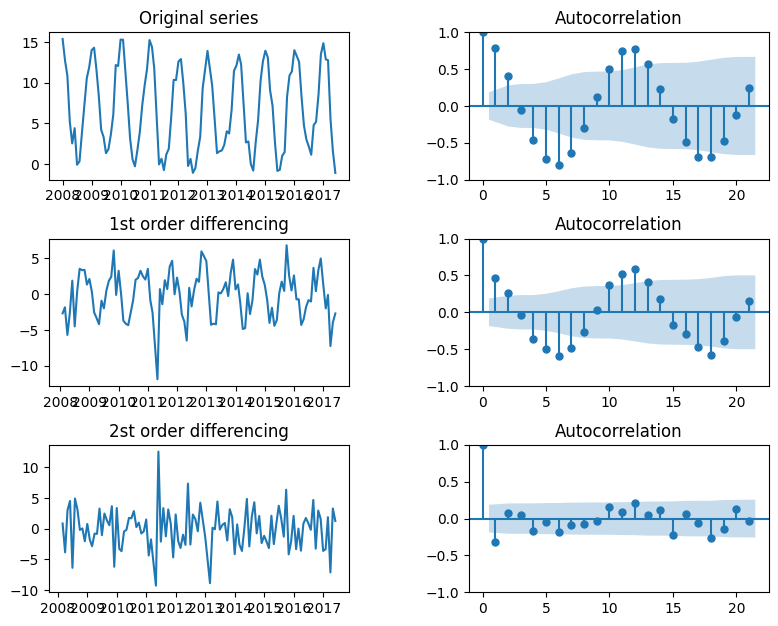

In [ ]:
#Original series 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})

fig, axes = plt.subplots(3,2)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
axes[0,0].plot(var_series); 
axes[0,0].set_title('Original series')
plot_acf(var_series, ax=axes[0,1])

axes[1,0].plot(var_series.diff())
axes[1,0].set_title('1st order differencing')
plot_acf(var_series.diff().dropna(), ax=axes[1,1])

axes[2,0].plot(var_series.diff().diff())
axes[2,0].set_title('2st order differencing')
plot_acf(var_series.diff().diff().dropna(), ax=axes[2,1])

plt.show()

##### si vede che già dal primo ordine di differenza la serie raggiunge la stazionarietà, in relatà sapendo dai test che la nostra serie è stazionaria, possiamo impostare il parametro d = 0 in ARIMA

C:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



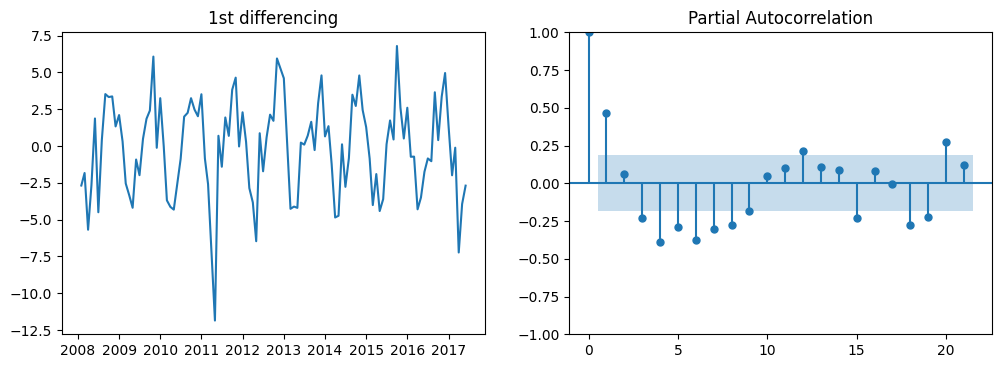

In [ ]:
plt.rcParams.update({'figure.figsize':(12,4), 'figure.dpi':100})
fig, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.2,hspace=0.2)

axes[0].plot(var_series.diff()); 
axes[0].set_title('1st differencing')
plot_pacf(var_series.diff().dropna(), ax=axes[1])
plt.show()




C:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



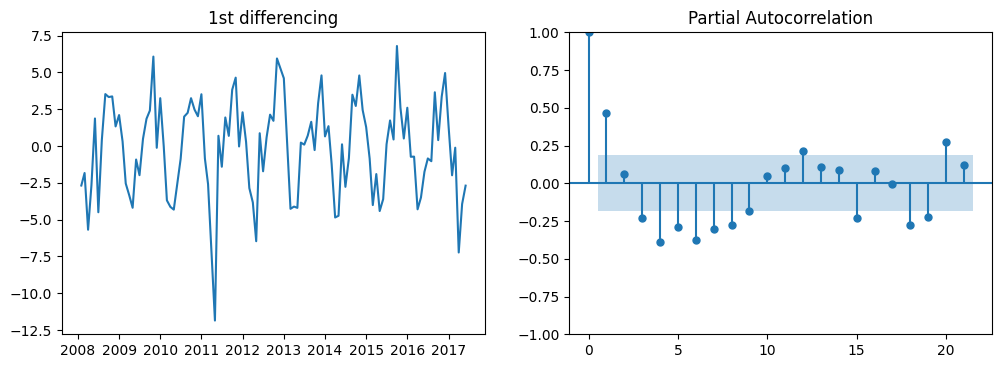

In [ ]:
fig, axes = plt.subplots(1,2, sharex=False)

axes[0].plot(var_series.diff())
axes[0].set_title('1st differencing')

plot_pacf(var_series.diff().dropna(), ax=axes[1])

axes[1].set()
#xlim=(dt.datetime(2008,1,1), dt.datetime(2018,1,1))
#axes[0, 0].set_xlim(dt.datetime(2017,4,4), dt.datetime(2017,4,13))
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(var_series, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                MinTemp   No. Observations:                  111
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -263.236
Date:                Thu, 07 Apr 2022   AIC                            536.473
Time:                        11:03:24   BIC                            550.020
Sample:                             0   HQIC                           541.969
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7722      1.232      5.497      0.000       4.358       9.187
ar.L1          0.6341      0.121      5.246      0.000       0.397       0.871
ma.L1          0.4826      0.119      4.058      0.0

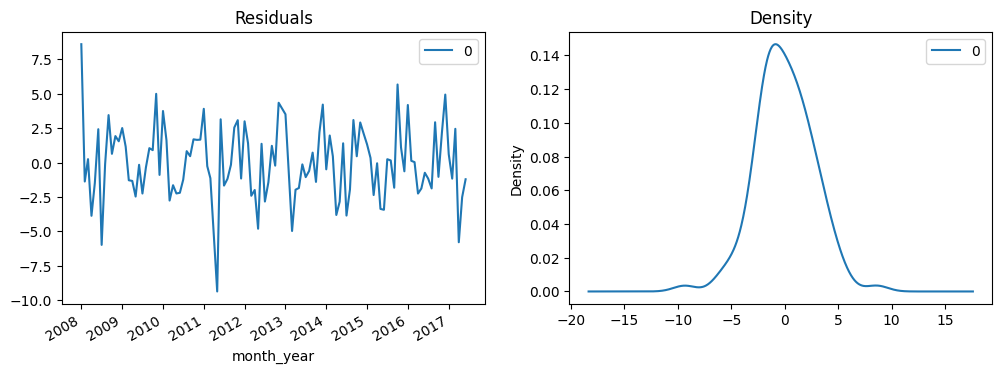

In [ ]:
#Plotting residual
residuals = pd.DataFrame(model_fit.resid)
fig, axes = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=axes[0])
residuals.plot(kind='kde',title="Density",ax=axes[1])
plt.show()


In [ ]:
from statsmodels.tsa.stattools import acf

train = var_series2[:80]
test = var_series2[80:]


In [ ]:
model = ARIMA(train, order=(2,0,2))
fitted = model.fit()


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



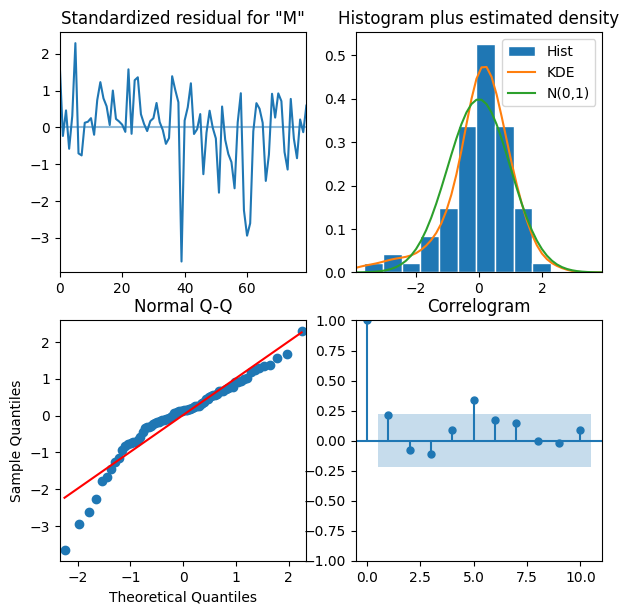

                               SARIMAX Results                                
Dep. Variable:                MinTemp   No. Observations:                   80
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -171.368
Date:                Thu, 07 Apr 2022   AIC                            354.737
Time:                        11:29:59   BIC                            369.029
Sample:                             0   HQIC                           360.467
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5981      0.325     20.294      0.000       5.961       7.235
ar.L1          1.6998      0.019     89.459      0.000       1.663       1.737
ar.L2         -0.9838      0.015    -65.606      0.0

In [ ]:
fitted.plot_diagnostics(figsize=(7,7))
plt.show()
print(fitted.summary())

In [ ]:
fc, se, conf=fitted.forecast(test.size, alpha=0.05)

fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index=test.index)
upper_series = pd.Series(conf[:,1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='Upper left', fontsize=8)
plt.show()

print(fitted.summary())


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



ValueError: too many values to unpack (expected 3)

In [ ]:
def forecast_accuracy(forecast, actual):
  mape = np.mean(np.abs(forecast-actual)/np.abs(actual))
  me=np.mean(forecast-actual)
  mae=np.mean(np.abs(forecast-actual))
  mpe = np.mean((forecast-actual)/actual)
  rmse=np.mean((forecast-actual)**2)**.5
  corr=np.corrcoef(forecast, actual)[0,1]
  mins=np.amin(np.hstack([forecast[:,None],actual[:,None]]),axis=1)
  maxs=np.amax(np.hstack([forecast[:,None],actual[:,None]]),axis=1)
  minmax=1-np.mean(mins/maxs)
  acf1=acf(fc-test)[1]
  return({'mape':mape, 'me':me, 'mae':mae, 'mpe':mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

In [ ]:
forecast_accuracy(fc, test.values)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 31